# Using `display.show_matrix`

`display.show_matrix` is a simple tool to visualize multiple matrices side-by-side.

In [1]:
%load_ext autoreload
%autoreload 2
# import sys
# sys.path.append('../')

from PyBMF.generators import BlockDiagonalMatrixGenerator
from PyBMF.utils.display import show_matrix

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
n_row = 300
n_col = 500
k = 5
noise = 0.2
seed = 1024
overlap = [0.6, 0.2]

gen = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=overlap)
gen.generate(seed=seed)

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1024


`settings` is a list of tuples, formatted as (matrix, location, description).

In [20]:
settings = [(gen.U, [0, 1], "U"), (gen.V.T, [1, 0], "V"), (gen.X, [0, 0], f"X {gen.X.shape}")]

The scaling in `show_matrix` can be set in 2 ways:

- By setting `scaling = 1.0`, it rescales automatically for you to generate a plot that fit the size of your screen. This is more intuitive when using a pop-up window for display. `scaling=0.5` is 50% of the optimal size.

- By setting `pixels=5`, it displays each cell in the plot with a 5-by-5-pixels block. This will overwrite the scaling settings.

# 1. Limit the figure to half of the screen size

The effect is more obvious in windowed display outside Jupyter Notebook.

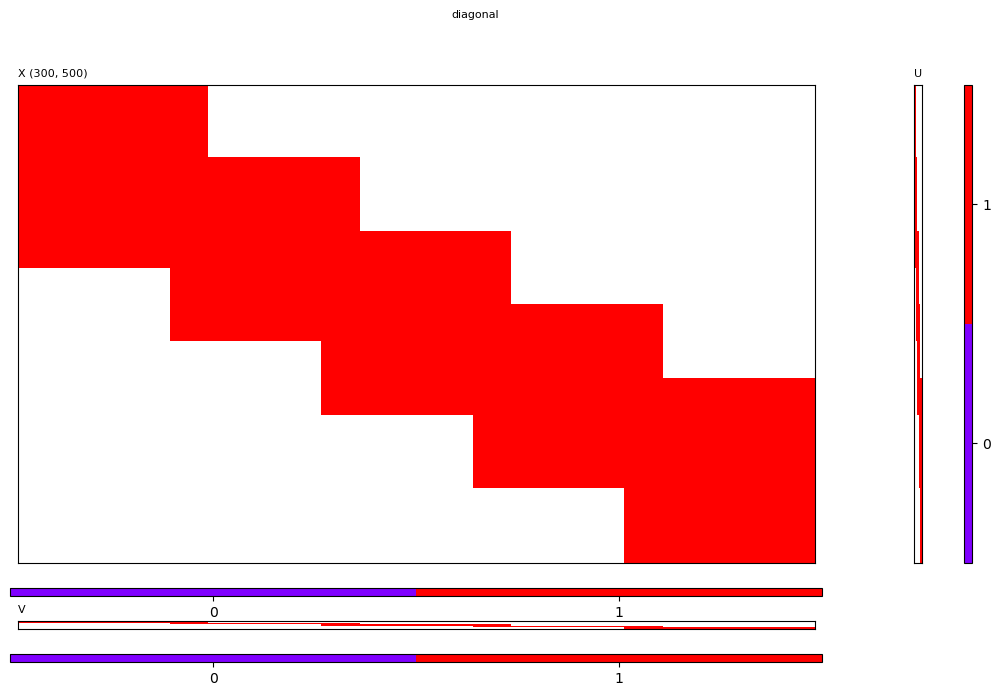

<Figure size 640x480 with 0 Axes>

In [21]:
show_matrix(settings=settings, colorbar=True, discrete=True, clim=[0, 1], scaling=0.5, title="diagonal")

`colorbar` is provided in case a matrix is real-valued.

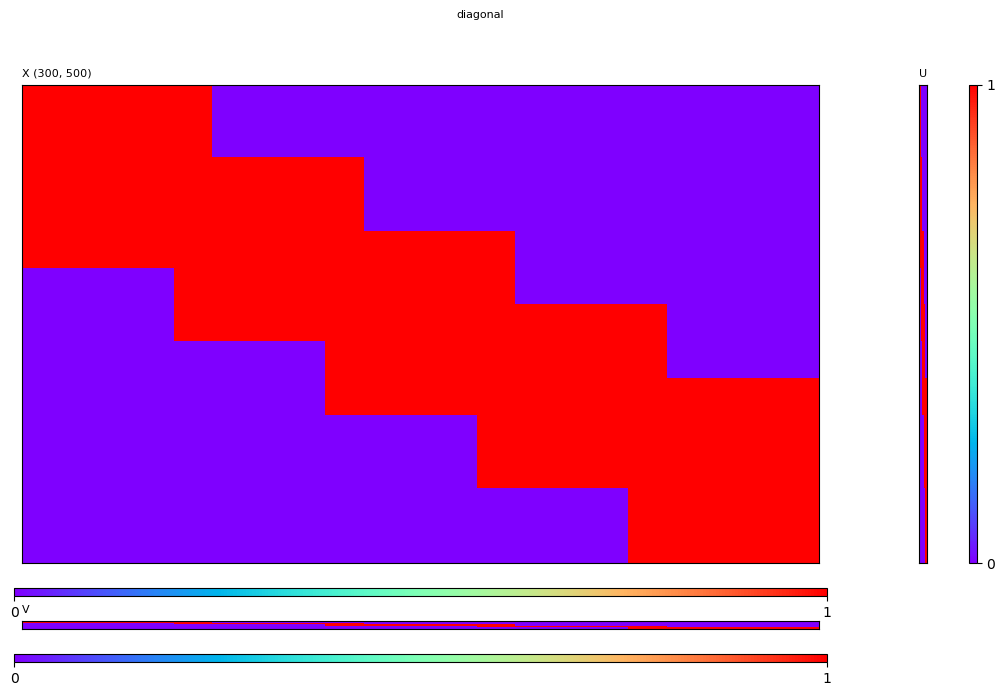

<Figure size 640x480 with 0 Axes>

In [22]:
show_matrix(settings=settings, colorbar=True, clim=[0, 1], keep_nan=False, scaling=0.5, title="diagonal")

# 2. Fix the pixels for a cell to 3x3

This will ignore the `scaling` settings.

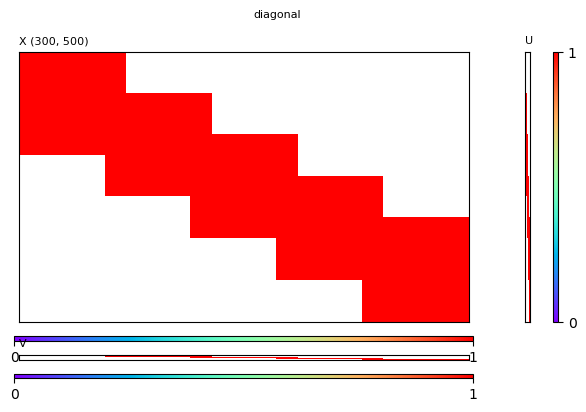

<Figure size 640x480 with 0 Axes>

In [24]:
show_matrix(settings=settings, pixels=2, clim=[0, 1], colorbar=True, title="diagonal")

For things to be easier, `generators` and `models` might have their own wrappers for `display.show_matrix`.

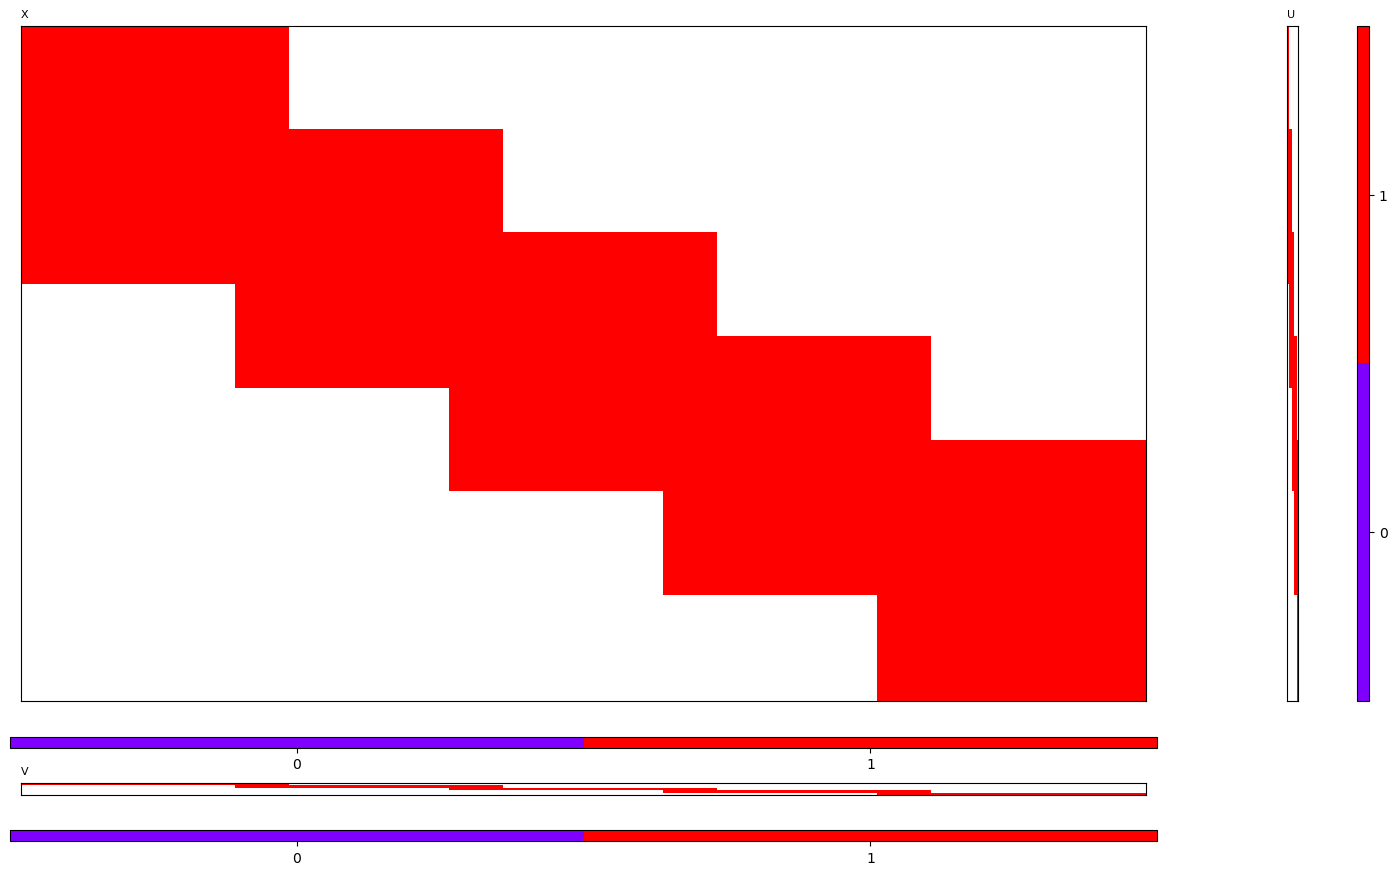

<Figure size 640x480 with 0 Axes>

In [25]:
gen.show_matrix()